In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
beis_2013 = pd.read_csv('~/Documents/PhD/Projects/10-ELECSIM/run/beis_case_study/data/reference_run/2013_projection_1.csv')
beis_2013

,fuel_type,2013,2014,2015,2016,2017,2018
0,Coal,141.910063,129.498620,106.438559,59.721642,49.302771,46.541663
1,Coal and gas CCS,0.000000,0.000000,0.000000,0.000000,0.000000,4.704962
2,Oil,2.743753,2.849605,2.834165,2.840292,2.847358,2.839684
3,Gas,87.750011,89.482223,99.666714,131.734002,128.029583,117.497721
4,Nuclear,58.337824,58.337824,56.286179,56.286179,56.286179,56.286179
5,Renewables,30.594590,31.304995,34.156731,45.546462,54.839538,60.464802


In [4]:
beis_2013_long = pd.melt(beis_2013, id_vars='fuel_type')
beis_2013_long.loc[:,'variable'] = beis_2013_long.variable.astype(np.float)

beis_2013_long.head()


,fuel_type,variable,value
0,Coal,2013.0,141.910063
1,Coal and gas CCS,2013.0,0.000000
2,Oil,2013.0,2.743753
3,Gas,2013.0,87.750011
4,Nuclear,2013.0,58.337824


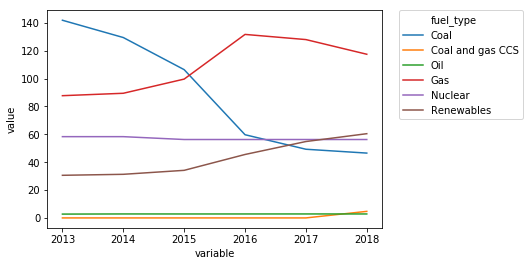

In [5]:
sns.lineplot(data=beis_2013_long, x='variable', y='value', hue='fuel_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [6]:
elecsim_run = pd.read_csv('~/Documents/PhD/Projects/10-ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_coal_dropout.csv')
elecsim_run = elecsim_run[['year','type','run_id','value_perc','Technology','value']]

elecsim_run['type']=elecsim_run['type'].str.replace("Predicted","ElecSim")
elecsim_run = elecsim_run.dropna()

elecsim_run

,year,type,run_id,value_perc,Technology,value
0,2013.0,Actual,-1.0,43.311625,Coal,14355.798134
1,2013.0,Actual,-1.0,22.707588,Nuclear,7526.513864
2,2013.0,Actual,-1.0,27.563219,Gas,9135.930888
3,2013.0,Actual,-1.0,6.417568,Wind,2127.126709
4,2013.0,Actual,-1.0,0.000000,Solar,0.000000
...,...,...,...,...,...,...
1608,2018.0,ElecSim,43.0,18.542359,Coal,3750.509885
1609,2018.0,ElecSim,43.0,1.713415,Solar,346.567538
1610,2018.0,ElecSim,43.0,28.797681,Nuclear,5824.824594
1612,2018.0,ElecSim,43.0,20.766595,Wind,4200.399800


In [7]:
elecsim_run_wide = pd.pivot_table(elecsim_run.drop('value', axis=1), index=['year','type','run_id'], columns='Technology')
elecsim_run_wide.columns= elecsim_run_wide.columns.droplevel(0)
elecsim_run_wide = elecsim_run_wide.reset_index()
elecsim_run_wide['Renewables'] = elecsim_run_wide.Wind + elecsim_run_wide.Solar
elecsim_run_wide = elecsim_run_wide.drop(['Solar', 'Wind'], axis=1)
elecsim_renewables_long = pd.melt(elecsim_run_wide, id_vars=['year','type','run_id'])
elecsim_renewables_long = elecsim_renewables_long.rename(columns={'value': 'value_perc'})
elecsim_renewables_long.head()



,year,type,run_id,Technology,value_perc
0,2013.0,Actual,-1.0,Coal,43.311625
1,2013.0,ElecSim,0.0,Coal,41.539086
2,2013.0,ElecSim,1.0,Coal,42.215840
3,2013.0,ElecSim,2.0,Coal,41.444071
4,2013.0,ElecSim,3.0,Coal,41.396416


In [8]:
def get_value_perc(df):
    df['value_perc'] = 100*df.value/df.value.sum()
    return df

beis_2013_long = beis_2013_long.rename(columns={"fuel_type":"Technology",'variable':'year'})
beis_2013_long  = beis_2013_long.groupby('year').apply(get_value_perc)
beis_2013_long['type'] = "BEIS"
beis_2013_long['run_id'] = -2
# beis_2013_long = beis_2013_long.drop("value", axis=1)
beis_2013_long.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/notebooks/validation-optimisation/data/results/beis_forecasts.csv')
beis_2013_long


,Technology,year,value,value_perc,type,run_id
0,Coal,2013.0,141.910063,44.162483,BEIS,-2
1,Coal and gas CCS,2013.0,0.000000,0.000000,BEIS,-2
2,Oil,2013.0,2.743753,0.853857,BEIS,-2
3,Gas,2013.0,87.750011,27.307848,BEIS,-2
4,Nuclear,2013.0,58.337824,18.154760,BEIS,-2
5,Renewables,2013.0,30.594590,9.521052,BEIS,-2
6,Coal,2014.0,129.498620,41.576159,BEIS,-2
7,Coal and gas CCS,2014.0,0.000000,0.000000,BEIS,-2
8,Oil,2014.0,2.849605,0.914879,BEIS,-2
9,Gas,2014.0,89.482223,28.728701,BEIS,-2


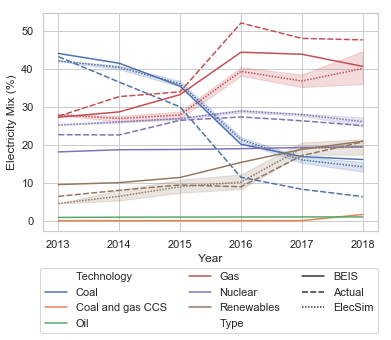

In [44]:
# all_projections['Technology'] = all_projections['Technology'].str.replace("Gas","CCGT")

all_projections = beis_2013_long.append(elecsim_renewables_long)
all_projections.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/notebooks/validation-optimisation/data/results/predictions_actuals_all_data_coal_dropout.csv')


all_projections = all_projections.rename(columns = {"type":'Type'})
sns.set(font_scale=1)
sns.set_style("whitegrid")
g = sns.lineplot(data=all_projections, x='year', y='value_perc', style='Type', hue='Technology')
# lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
lgd = plt.legend(bbox_to_anchor=(1,-0.17), borderaxespad=0., ncol=3)


g.set(xlabel='Year', ylabel='Electricity Mix (%)')
plt.savefig('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/notebooks/validation-optimisation/figures/results/throughout_years_beis_elecsim_comparison_coal_dropout_leg_below.pdf',dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [10]:
all_projections

,Technology,run_id,Type,value,value_perc,year
0,Coal,-2.0,BEIS,141.910063,44.162483,2013.0
1,Coal and gas CCS,-2.0,BEIS,0.000000,0.000000,2013.0
2,Oil,-2.0,BEIS,2.743753,0.853857,2013.0
3,Gas,-2.0,BEIS,87.750011,27.307848,2013.0
4,Nuclear,-2.0,BEIS,58.337824,18.154760,2013.0
...,...,...,...,...,...,...
1075,Renewables,39.0,ElecSim,NaN,15.648026,2018.0
1076,Renewables,40.0,ElecSim,NaN,15.862426,2018.0
1077,Renewables,41.0,ElecSim,NaN,27.392806,2018.0
1078,Renewables,42.0,ElecSim,NaN,27.466040,2018.0


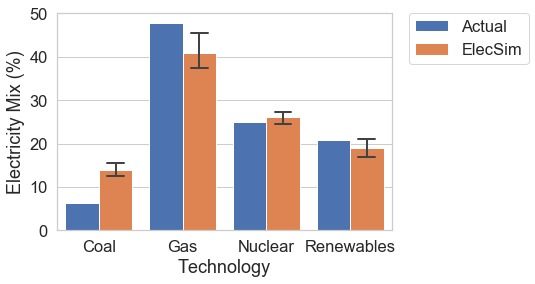

In [11]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

g = sns.barplot(data=all_projections[(all_projections.year==2018) & (all_projections.Type!='BEIS') & (all_projections.run_id<=40)], x='Technology', y='value_perc', hue='Type', capsize = 0.2, saturation = 8, errwidth = 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g.set(xlabel='Technology', ylabel='Electricity Mix (%)')
plt.savefig('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/notebooks/validation-optimisation/figures/introduction/best_run_coal_dropout_95_ci.pdf',dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')





In [12]:


all_projections.reset_index(drop=True).groupby(['Type','Technology','year'])['value_perc'].mean().to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/notebooks/validation-optimisation/data/results/predictions_actuals_coal_dropout1.csv')


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0.5, 'Electricity Mix (%)'), Text(0.5, 0, 'Year')]

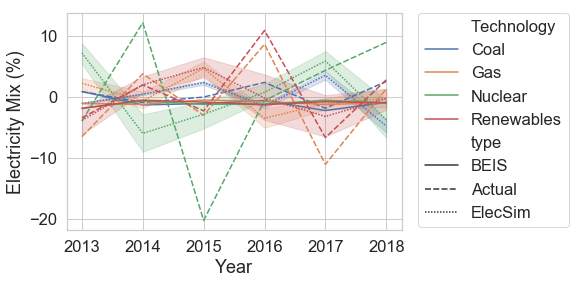

In [13]:

def get_relative_error(x):
    x['relative_error'] = (x.value_perc - x[x.Type=="Actual"].value_perc.values)
    x['type'] = x.Type
    return x

# all_projections
all_projections = beis_2013_long.append(elecsim_renewables_long)

to_plot = all_projections[~all_projections["Technology"].str.contains('Coal and gas CCS|Oil')]
to_plot['relative_error'] = to_plot.groupby(['year', "Technology"], as_index=False).apply(lambda x: x.value_perc - x[x.type=="Actual"].value_perc.values).reset_index().value_perc
to_plot

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.lineplot(data=to_plot, x='year', y='relative_error', style='type', hue='Technology')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set(xlabel='Year', ylabel='Electricity Mix (%)')
# plt.savefig('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/figures/results/throughout_years_beis_elecsim_comparison.pdf',dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [14]:
best_mix_year = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_total')
contributed_results = best_mix_year.filter(regex='contributed_')

contributed_results['year'] = best_mix_year['year']
contributed_results['run_id'] = best_mix_year['run_id']

contributed_results = contributed_results.rename(columns={'contributed_PV': "contributed_solar"})
# contributed_results
cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])

contributed_results['contributed_Wind'] = contributed_results['contributed_Offshore'] +  contributed_results['contributed_Onshore']
contributed_results = contributed_results.drop(['contributed_Offshore', 'contributed_Onshore'], axis=1)
contributed_results

FileNotFoundError: [Errno 2] File b'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_total' does not exist: b'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_total'

In [ ]:
def get_weighted_average(df):
#     print(df)
    year = df['year']
    run_id = df['run_id']
    df.apply(lambda x: x*cluster_size.values)
    df['run_id'] = run_id
    df['year'] = year
    return df
    #     return df.apply(lambda x: np.average(x, weights=cluster_size.values))

results_wa = contributed_results.groupby(['run_id','year']).apply(lambda x: get_weighted_average(x)).reset_index(drop=True)

results_wa

In [ ]:
def sum_years(df):
    year = df['year'].iloc[0]
    run_id = df['run_id'].iloc[0]
    sum_df = df.sum()
    sum_df.year=year
    sum_df.run_id=run_id
    return sum_df
    

elecsim_summed = results_wa.groupby(["year",'run_id']).apply(sum_years)
elecsim_summed

In [ ]:

hist_long = pd.melt(elecsim_summed, id_vars=["run_id", "year"])
hist_long

In [ ]:
hist_long['variable'] = hist_long.variable.str.split("_").str[-1].str.lower()
hist_long['year'] = hist_long['year'] + 2013

In [ ]:
def get_mix(df):
    df['value_perc'] = df['value']/sum(df['value'])*100
    return df

hist_long_perc = hist_long.groupby(['year','run_id']).apply(lambda x: get_mix(x))
hist_long_perc = hist_long_perc.rename(columns={"type":"Type", "variable":'Technology'})
hist_long_perc['Technology'] = hist_long_perc['Technology'].map({'coal': "Coal", 'ccgt': "CCGT", 'nuclear':"Nuclear", "wind":"Wind","solar":"Solar", "gas":"Recip_gas"})
hist_long_perc

In [ ]:
hist_long_perc = hist_long_perc.dropna()
# hist_long_perc = hist_long_perc.drop('index', axis=1)
hist_long_perc['type']='ElecSim'
hist_long_perc
both = hist_long_perc.append(elecsim_run[elecsim_run.type=="Actual"])
both = both.reset_index(drop=True)
both

In [ ]:
# both.year = both.year.astype(int)

In [ ]:
sns.lineplot(data=both, x='year', y='value_perc', hue='Technology', style='type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
beis_2013_long.loc[:,"value"] = beis_2013_long.loc[:,"value"]*100

In [ ]:
beis_2013_long

In [ ]:
beis_actual = beis_2013_long.append(elecsim_run[elecsim_run.type=="Actual"])
beis_actual
sns.lineplot(data=beis_actual, x='year', y='value', style="type", hue='Technology')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# 2018-2035 Projections

In [ ]:
beis_2035 = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/2018-2035-beis.csv')
beis_2035.head()

In [ ]:
beis_2035_long = pd.melt(beis_2035, id_vars='fuel_type')
beis_2035_long.head()

In [ ]:
sns.lineplot(data=beis_2035_long, x='variable', y='value', hue='fuel_type')